# Time-dependent heat equation

Now that we have some experience solving for the steady-state temperature distribution, it's time to return to time-dependent behavior.

## Summary of commands

In this exercise, we will apply several of the commands we've already learned!

## Heat in a wire

Heat generated from an electric wire is defined by the time-dependent heat equation:

$$ \lambda^2 \dfrac{\partial^2 u}{\partial x^2} + q = \dfrac{\partial u}{\partial t} $$

with $u(0,t) = u(L,t) = 0$ and $u(x,0) = 0$.

Use the discretization scheme $u_i^{n+1} = u_i^n + \dfrac{\lambda^2 dt}{h^2} \left( u_{i-1}^n - 2u_i^n + u_{i+1}^n \right) + q \cdot dt $ with $N = 10$, $L = 1$, $\lambda = 1$, and $q = 1$ to find the temperature distribution at $t = \begin{bmatrix} 0 & 0.01 & 0.05 & 0.1 & 1 \end{bmatrix}$.
Take $dt = 0.005$.

The analytical solution for this problem through Fourier series is

$$ T(x,t) = -\dfrac{qx^2}{2} + \dfrac{qLx}{2} - \sum_{n=\text{odd}}^{\infty} \dfrac{4L^2q}{n^3 \pi^3} \sin \left( \dfrac{n \pi x}{L} \right) \exp \left( - \frac{n^2 \pi^2 t}{L^2} \right) $$

Plot the analytical solution at the same time steps using the first $10$ partial sums and compare the two graphs.

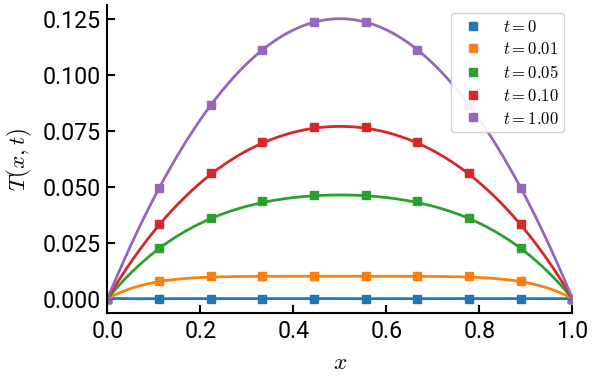

In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# initialize
N = 10
lamda = 1    # we misspell because 'lambda' is a reserved keyword in Python
L = 1
q = 1
h = L / (N - 1)
dt = 0.005
t = np.array([0, 0.01, 0.05, 0.1, 1])
x = np.linspace(0, L, N)
u = np.zeros(N)

# plot initial
fig, ax = plt.subplots()
ax.plot(x, u, 's', ms=6, label="$t = 0$")
ax.set(xlabel='$x$', ylabel="$T(x,t)$", xlim=[0,1])

# discretized solution - plot as squares
for j in range(1, int(t[-1]/dt) + 1):
    u_old = u.copy()
    for i in range(1, N - 1):
        u[i] = u_old[i] + lamda**2 * dt / h**2 * (u_old[i-1] - 2 * u_old[i] + u_old[i+1]) + q * dt
    if j * dt in t:
        ax.plot(x, u, 's', ms=6, label=f"$t = {j * dt:.2f}$")

# analytical solution
nmax = 19
x = np.linspace(0, L, 1000)

# plot analytical solution as curves
for k,tt in enumerate(t):
    T = -q * x**2 /2 + q * L * x /2
    for n in range(1, nmax+1, 2):
        T -= 4 * L**2 * q / (n**3 * np.pi**3) * np.sin(n * np.pi * x / L) * \
             np.exp(-n**2 * np.pi**2 * tt / L**2)
    ax.plot(x, T, lw=2, c=f"C{k}")

ax.legend(fontsize=12, framealpha=0.9)
plt.show()